In [2]:
#importing required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plp
import sklearn

In [4]:
#importing Dataset
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)
print('Finished')


Finished


In [5]:
#print data set
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
#exploring
df.shape

(25, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot:title={'center':'Hours vs scores'}, xlabel='Hours', ylabel='Scores'>

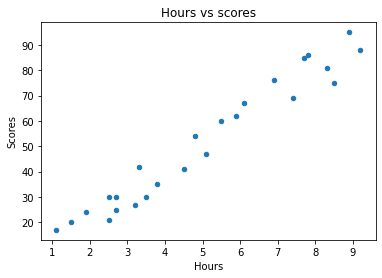

In [9]:
#plotting graph(2d)
df.plot(kind="scatter", x="Hours", y="Scores",title = 'Hours vs scores')

In [10]:
#checking if there is any missing value 
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [13]:
#splitting data into attributes and label
x = df.drop('Scores',axis = 1 )
y = df.drop('Hours',axis = 1 )
print('shape of X = ',X.shape)
print('shape of y = ',y.shape)



shape of X =  (25, 1)
shape of y =  (25, 1)


In [15]:
#dividing dataset for training and testing 
from sklearn.model_selection import train_test_split
X_train,X_test,y_learn,y_test = train_test_split(X,y,test_size = 0.2,random_state = 50)
print('Done ')

Done 


In [16]:
#training the algorithm
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_learn)


LinearRegression()

In [27]:
#predicting test of x 
y_marks = lr.predict(X_test)
y_marks


array([[88.21139357],
       [28.71845267],
       [69.02012231],
       [39.27365186],
       [13.36543566]])

In [28]:
#concating study hours , original marks and ,predicted marks 
pd.DataFrame(np.c_[X_test,y_test,y_marks], columns=["study_hours","original_marks","predicted_marks"])

,study_hours,original_marks,predicted_marks
0,8.9,95.0,88.211394
1,2.7,30.0,28.718453
2,6.9,76.0,69.020122
3,3.8,35.0,39.273652
4,1.1,17.0,13.365436


In [29]:
#checking accuracy 
lr.score(X_test,y_test)

0.971014141329942

In [39]:
#evaluating 
from sklearn import metrics
print('Mean absolute error :',metrics.mean_absolute_error(y_test,y_marks))
print('Mean sqaured error:',metrics.mean_squared_error(y_test,y_marks))


Mean absolute error : 4.5916495300630285
Mean sqaured error: 25.584078296539932


In [32]:
#predicting our own 
hours = 9.25
own_pred = lr.predict([[hours]])
print('hours studied ={}'.format(hours))
print('predicted score ={}'.format(own_pred[0][0]))

hours studied =9.25
predicted score =91.56986604454478


In [37]:
#testing data for 8.9 hours
hours = 2
own_pred = lr.predict([[hours]])
print('hours studied ={}'.format(hours))
print('predicted score ={}'.format(own_pred[0][0]))

hours studied =2
predicted score =22.0015077237386
